In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [3]:
# Load the data
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# Display the first few rows of the datasets
print(data.head())
print(X.head(100))


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [4]:
print(f"Data Shape: {data.shape}")
print(f"X Shape: {X.shape}")
print(f"Missing values in data: {data.isnull().sum()}")

Data Shape: (90, 18)
X Shape: (90, 83)
Missing values in data: FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64


In [5]:
# Create target variable 'Y' from the 'Class' column
Y = data['Class'].to_numpy()
print("Columns in data:", data.columns)


Columns in data: Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')


In [6]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [7]:
# Standardize the data (only on training and test sets, not on whole data before split)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)  # Only transform test data


Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy on validation data: 0.8464285714285713
Logistic Regression Accuracy on Test Data: 0.8333333333333334


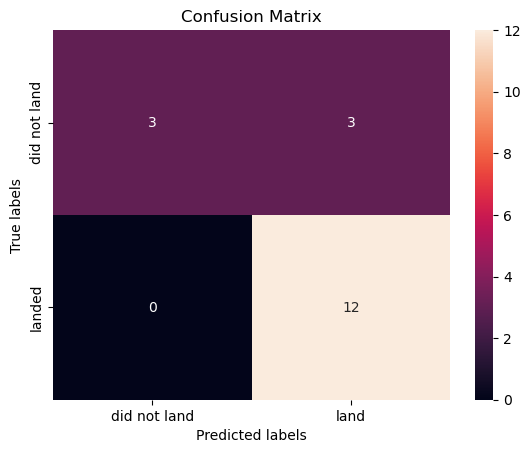

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [8]:
# Logistic Regression with Hyperparameter Tuning
parameters_lr = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
logreg = LogisticRegression(random_state=2)
logreg_cv = GridSearchCV(logreg, parameters_lr, cv=10)
logreg_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Best accuracy on validation data:", logreg_cv.best_score_)

accuracy_lr = logreg_cv.score(X_test, Y_test)
print(f"Logistic Regression Accuracy on Test Data: {accuracy_lr}")
yhat_lr = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)
print(classification_report(Y_test, yhat_lr))


Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best accuracy on validation data: 0.8482142857142856
SVM Accuracy on Test Data: 0.8333333333333334


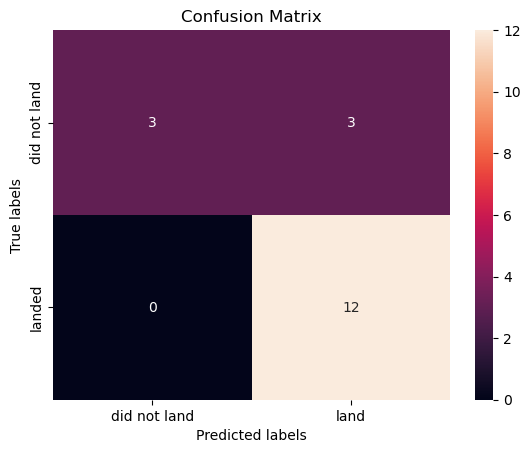

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [9]:
# Support Vector Machine (SVM) with Hyperparameter Tuning
parameters_svm = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
                  'C': np.logspace(-3, 3, 5),
                  'gamma': np.logspace(-3, 3, 5)}
svm = SVC(random_state=2)
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Best accuracy on validation data:", svm_cv.best_score_)

accuracy_svm = svm_cv.score(X_test, Y_test)
print(f"SVM Accuracy on Test Data: {accuracy_svm}")
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)
print(classification_report(Y_test, yhat_svm))


Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Best accuracy on validation data: 0.8767857142857143
Decision Tree Accuracy on Test Data: 0.8333333333333334


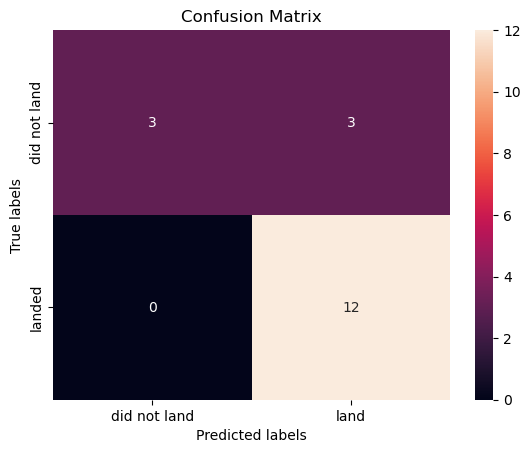

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [10]:
# Decision Tree with Hyperparameter Tuning
parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier(random_state=2)

tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Best accuracy on validation data:", tree_cv.best_score_)

accuracy_tree = tree_cv.score(X_test, Y_test)
print(f"Decision Tree Accuracy on Test Data: {accuracy_tree}")
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)
print(classification_report(Y_test, yhat_tree)) 


Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Best accuracy on validation data: 0.8482142857142858
KNN Accuracy on Test Data: 0.8333333333333334


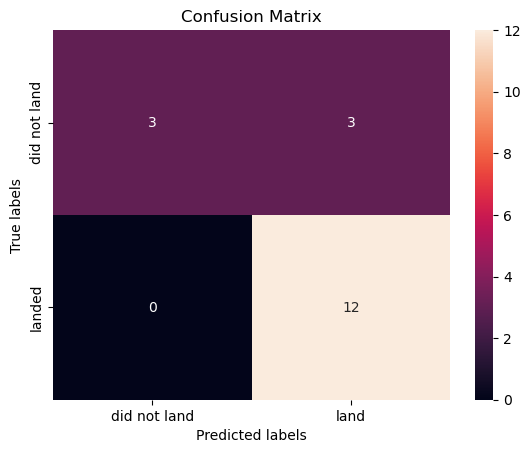

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [11]:
# K-Nearest Neighbors (KNN) with Hyperparameter Tuning
parameters_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Best accuracy on validation data:", knn_cv.best_score_)

accuracy_knn = knn_cv.score(X_test, Y_test)
print(f"KNN Accuracy on Test Data: {accuracy_knn}")
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)
print(classification_report(Y_test, yhat_knn)) 



In [12]:
# Compare the accuracy of all models
models = {
    'Logistic Regression': accuracy_lr,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_tree,
    'KNN': accuracy_knn
}

best_model = max(models, key=models.get)
print(f"The best-performing model is {best_model} with an accuracy of {models[best_model]}")


The best-performing model is Logistic Regression with an accuracy of 0.8333333333333334


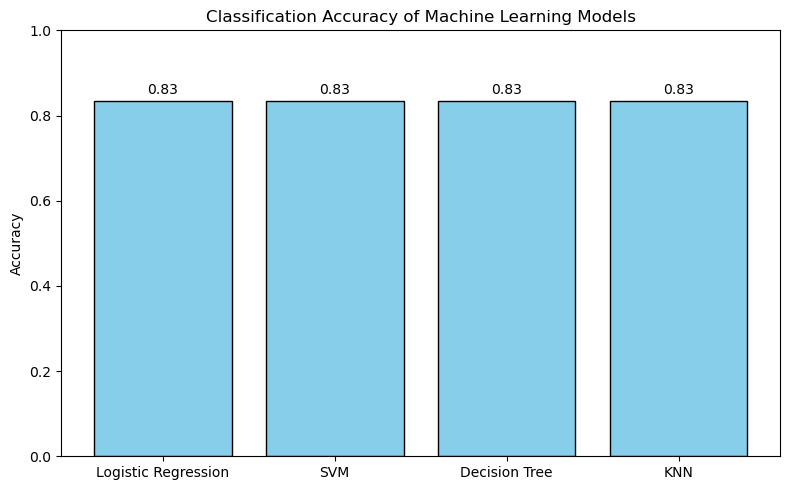

In [14]:
# Accuracy values for all models
models = {
    'Logistic Regression': accuracy_lr,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_tree,
    'KNN': accuracy_knn
}

# Unpack dictionary into labels and values
model_names = list(models.keys())
accuracies = list(models.values())

# Create bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color='skyblue', edgecolor='black')

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

# Chart title and labels
plt.title("Classification Accuracy of Machine Learning Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# Show the chart
plt.tight_layout()
plt.show()
